**Generating & Visualising 3D Terrains in Python**

Today, let's put together a 3D visualisation of randomly generated 'terrain' with Python. Data visualisation is an absolutely key skill in any developers pocket, as communicating both data, analysis and more is thoroughly simplified through the use of graphs. While a picture tells a thousand words, this also means that it'll bring a thousand intepretations.

This is what we are going to try and reproduce:

![3D Terrain in Plotly]({static img/3d-terrain-plotly.png})

First off, before generating 3D terrain, it would be nice to generate 2D terrain. To achieve this, we are going to make use of [Perlin Noise](https://en.wikipedia.org/wiki/Perlin_noise). Perlin noise, created by Ken Perlin in 1983, for the movie Tron, was originally developed to make more natural looking textures on surfaces. The wikipedia site has a great graphical breakdown of how the algorithm works behind the scenes. 

For Perlin noise in Python, rather than implementing it ourselves, there is a package (with a quite apt name) named [`noise`](https://pypi.org/project/noise/). The `noise` package contains multiple algorithms inside it for generating different types of noise.

For visualising our terrain in the first instance, we shall use `matplotlib`.

As always, we import the necessary libraries for our project at the beginning. Make note of `mpl_toolkits.mplot3d`, this comes along with `matplotlib` and is required for plotting in 3 dimensions. If you are working in a `jupyter` notebook, when you plot in 3D with matplotlib, the resulting graph will not be interactive unless the magic command `%matplotlib qt` is used and `pyqt5` is installed in your environment. This will create a new window for your plot where you can interact with it.

In [1]:
%matplotlib inline
import noise
import numpy as np
import matplotlib
from mpl_toolkits.mplot3d import axes3d

Now that we have imported all of our necessary libraries to begin with. Let's find out how to interact with the `noise` package through use of the `help()` function. As we can see below, there are a number of settings used when passed into any of the `pnoisex` functions (replace x with amount of dimensions, eg, 2 for 2 dimensions).

In [2]:
help(noise.pnoise2)
help(noise.pnoise3)

Help on built-in function noise2 in module noise._perlin:

noise2(...)
    noise2(x, y, octaves=1, persistence=0.5, lacunarity=2.0, repeatx=1024, repeaty=1024, base=0.0)
    
    2 dimensional perlin improved noise function (see noise3 for more info)

Help on built-in function noise3 in module noise._perlin:

noise3(...)
    noise3(x, y, z, octaves=1, persistence=0.5, lacunarity=2.0repeatx=1024, repeaty=1024, repeatz=1024, base=0.0)
    
    return perlin "improved" noise value for specified coordinate
    
    octaves -- specifies the number of passes for generating fBm noise,
    defaults to 1 (simple noise).
    
    persistence -- specifies the amplitude of each successive octave relative
    to the one below it. Defaults to 0.5 (each higher octave's amplitude
    is halved). Note the amplitude of the first pass is always 1.0.
    
    lacunarity -- specifies the frequency of each successive octave relative
    to the one below it, similar to persistence. Defaults to 2.0.
    
    

In [3]:
shape = (50,50)
scale = 100.0
octaves = 6
persistence = 0.5
lacunarity = 2.0

Now to generate our 2D terrain! We initialise a [numpy array](https://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html), that will contain the values of our world. As we initalise the array with all zero values, now it is time to iterate through the empty array and fill it with Perlin Noise!

In [4]:
world = np.zeros(shape)
for i in range(shape[0]):
    for j in range(shape[1]):
        world[i][j] = noise.pnoise2(i/scale, 
                                    j/scale, 
                                    octaves=octaves, 
                                    persistence=persistence, 
                                    lacunarity=lacunarity, 
                                    repeatx=1024, 
                                    repeaty=1024, 
                                    base=42)

We have now initialised our 2 dimensional array with all the values inside for our terrain, let's plot it now! Since we are mimicking topography, let's use the 'terrain' colormap. All the available colormaps in `matplotlib` are listed here: https://matplotlib.org/examples/color/colormaps_reference.html

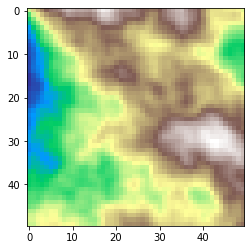

In [6]:
matplotlib.pyplot.imshow(world,cmap='terrain')

Beautiful! We can now see our 'lake' off to the side and our 'mountains' over on the right.

For plotting this in 3 dimensions, we must initialise 2 more arrays which will contain the x-y co-ordinates of our world.

In [5]:
lin_x = np.linspace(0,1,shape[0],endpoint=False)
lin_y = np.linspace(0,1,shape[1],endpoint=False)
x,y = np.meshgrid(lin_x,lin_y)

Now it's time to plot in 3D with matplotlib, there is a note above if you are using jupyter regarding interactivity.

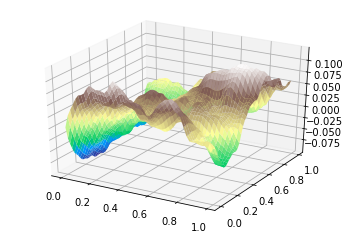

In [7]:
fig = matplotlib.pyplot.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(x,y,world,cmap='terrain')

Now let's use [Plotly](https://plot.ly/), to make an interactive plot so everybody can fly around in our terrain.

To make sure that we can keep the same colour map, [Plotly](https://plot.ly/), has nicely documented a conversion from matplotlib colour maps to Plotly compatible ones. This is listed here: 

In [8]:
terrain_cmap = matplotlib.cm.get_cmap('terrain')
def matplotlib_to_plotly(cmap, pl_entries):
    h = 1.0/(pl_entries-1)
    pl_colorscale = []

    for k in range(pl_entries):
        C = list(map(np.uint8, np.array(cmap(k*h)[:3])*255))
        pl_colorscale.append([k*h, 'rgb'+str((C[0], C[1], C[2]))])

    return pl_colorscale

terrain = matplotlib_to_plotly(terrain_cmap, 255)

Finally time to produce the interactive graph! Luckily for us, Plotly has created an API to the JavaScript library so this can be produce solely in Python.

In [9]:
import plotly
import plotly.graph_objects as go
plotly.offline.init_notebook_mode(connected=True)

fig = go.Figure(data=[go.Surface(colorscale=terrain,z=world)])

fig.update_layout(title='Random 3D Terrain')

# Note that include_plotlyjs is used as cdn so that the static site generator can read it and present it on the browser. This is not typically required.
html = plotly.offline.plot(fig, filename='3d-terrain-plotly.html',include_plotlyjs='cdn')

In [10]:
# This is for showing within a jupyter notebook on the browser.
from IPython.core.display import HTML
HTML(html)

0.12291846424341202


In [30]:
def get_max_value_co_ordinates(numpy_array):
    result = np.where(numpy_array == np.amax(numpy_array))
    return list(zip(result[0],result[1],[np.amax(numpy_array)]))

print(get_max_value_co_ordinates(world))

[(30, 42, 0.12291846424341202)]


In [29]:
np.gradient(world)
fig = go.Figure(data=[go.Surface(colorscale=terrain,z=np.gradient(world))])

fig.update_layout(title='Random 3D Terrain')

fig.show()